In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC

# Metrics
from sklearn.metrics import accuracy_score

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando dados de from
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
# Separação de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=4)

In [4]:
df_results = pd.DataFrame()

# Modelos

## Random Forest

In [5]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [6]:
y_pred = rf.predict(x_test)
print("A acurácia foi de %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

A acurácia foi de 95.65%


In [7]:
resp = cross_val_score(rf, x_train, y_train, scoring='accuracy')
df_results['RandomForest'] = resp

## Bagging

In [8]:
bg = BaggingClassifier()
bg.fit(x_train, y_train)

BaggingClassifier()

In [9]:
y_pred = bg.predict(x_test)
print("A acurácia foi de %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

A acurácia foi de 94.24%


In [10]:
resp = cross_val_score(bg, x_train, y_train, scoring='accuracy')
df_results['Bagging'] = resp

## Ada Bosting

In [11]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [12]:
y_pred = adb.predict(x_test)
print("A acurácia foi de %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

A acurácia foi de 71.84%


In [13]:
resp = cross_val_score(adb, x_train, y_train, scoring='accuracy')
df_results['AdaBoosting'] = resp

## Decision Tree

In [14]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
y_pred = dt.predict(x_test)
print("A acurácia foi de %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

A acurácia foi de 87.76%


In [16]:
resp = cross_val_score(dt, x_train, y_train, scoring='accuracy')
df_results['DecisionTree'] = resp

## SVC

In [17]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [18]:
y_pred = svc.predict(x_test)
print("A acurácia foi de %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

A acurácia foi de 97.70%


In [19]:
resp = cross_val_score(svc, x_train, y_train, scoring='accuracy')
df_results['SVC'] = resp

## 10-Fold Cross-Validation

[Text(0, 0, 'RandomForest'),
 Text(0, 0, 'Bagging'),
 Text(0, 0, 'AdaBoosting'),
 Text(0, 0, 'DecisionTree'),
 Text(0, 0, 'SVC')]

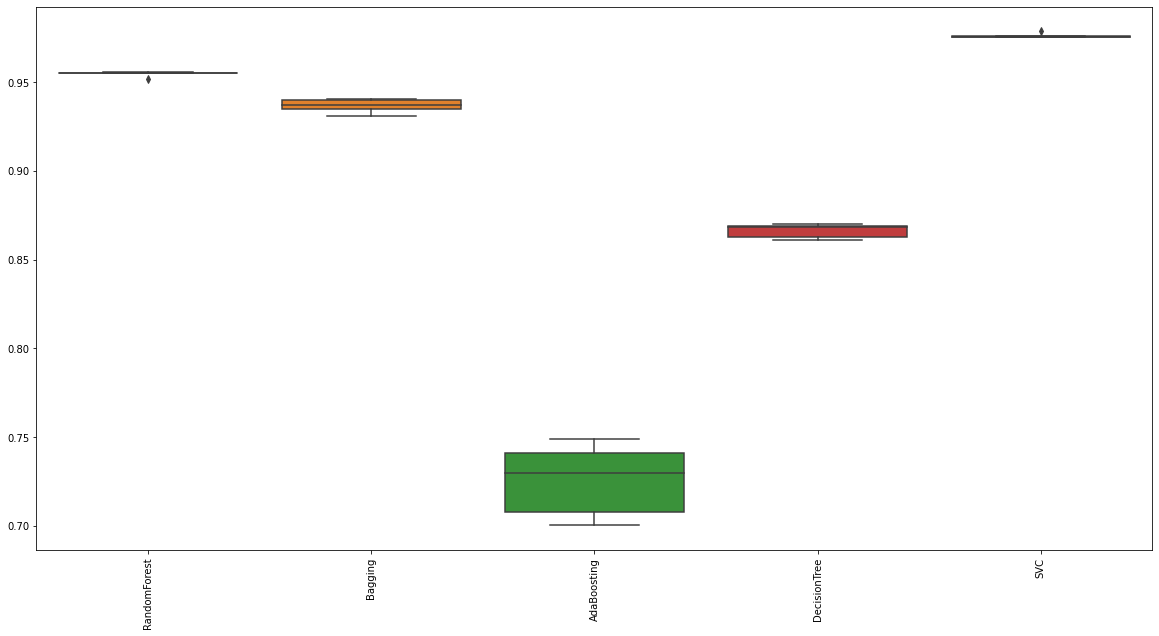

In [20]:
labels = df_results.columns
plt.figure(figsize=(20,10))

sns.boxplot(data = df_results).set_xticklabels(labels, rotation=90)

----

## Construir meu ensemble

In [21]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=20)
bg_model = BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=20)
adb_model = AdaBoostClassifier(n_estimators=5, learning_rate=1)

In [22]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[
                ('dt_model', dt_model),
                ('rf_model', rf_model),
                ('bg_model', bg_model),
                ('adb_model', adb_model)],
    voting='hard')

In [23]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt_model', DecisionTreeClassifier()),
                             ('rf_model',
                              RandomForestClassifier(n_estimators=20)),
                             ('bg_model',
                              BaggingClassifier(max_samples=0.5,
                                                n_estimators=20)),
                             ('adb_model',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=5))])

In [24]:
y_pred = vc.predict(x_test)
print("A acurácia foi de %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

A acurácia foi de 94.38%
